In [ ]:
import yfinance as yf
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
btc_ticker = yf.Ticker("BTC-USD")

if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [ ]:
def add_gross_profit_feature(data):
    data['gross_profit'] = data['close'] * data['volume']
    return data

In [ ]:
def visualize_data(data, predictions):
    plt.figure(figsize=(12, 6))

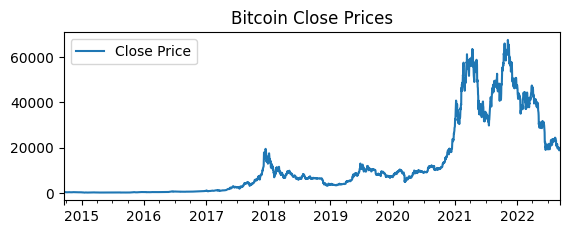

In [ ]:
plt.subplot(2, 1, 1)
btc['close'].plot(label='Close Price')
plt.title('Bitcoin Close Prices')
plt.legend()

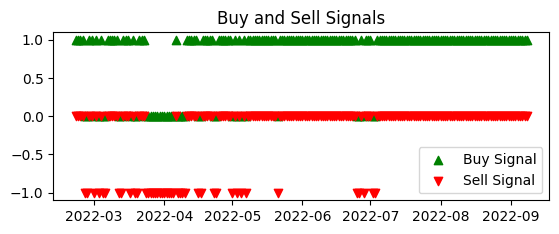

In [ ]:
plt.subplot(2, 1, 2)
predictions['buy_signal'] = predictions['predictions'].apply(lambda x: 1 if x == 1 else 0)
predictions['sell_signal'] = predictions['predictions'].apply(lambda x: -1 if x == 0 else 0)
plt.scatter(predictions.index, predictions['buy_signal'], label='Buy Signal', marker='^', color='g')
plt.scatter(predictions.index, predictions['sell_signal'], label='Sell Signal', marker='v', color='r')
plt.title('Buy and Sell Signals')
plt.legend()


In [ ]:
btc.index = pd.to_datetime(btc.index)

In [ ]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-07 00:00:00+00:00,43998.464844,44495.570312,43662.230469,43943.097656,19330573863,0.0,0.0
2024-01-08 00:00:00+00:00,43948.707031,47218.000000,43244.082031,46970.503906,42746192015,0.0,0.0
2024-01-09 00:00:00+00:00,46987.640625,47893.699219,45244.714844,46139.730469,39821290992,0.0,0.0


In [ ]:
del btc["Dividends"]
del btc["Stock Splits"]


In [ ]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-01-07 00:00:00+00:00,43998.464844,44495.570312,43662.230469,43943.097656,19330573863
2024-01-08 00:00:00+00:00,43948.707031,47218.000000,43244.082031,46970.503906,42746192015
2024-01-09 00:00:00+00:00,46987.640625,47893.699219,45244.714844,46139.730469,39821290992


In [ ]:
btc.columns = [c.lower() for c in btc.columns]


In [ ]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-01-07 00:00:00+00:00,43998.464844,44495.570312,43662.230469,43943.097656,19330573863
2024-01-08 00:00:00+00:00,43948.707031,47218.000000,43244.082031,46970.503906,42746192015
2024-01-09 00:00:00+00:00,46987.640625,47893.699219,45244.714844,46139.730469,39821290992


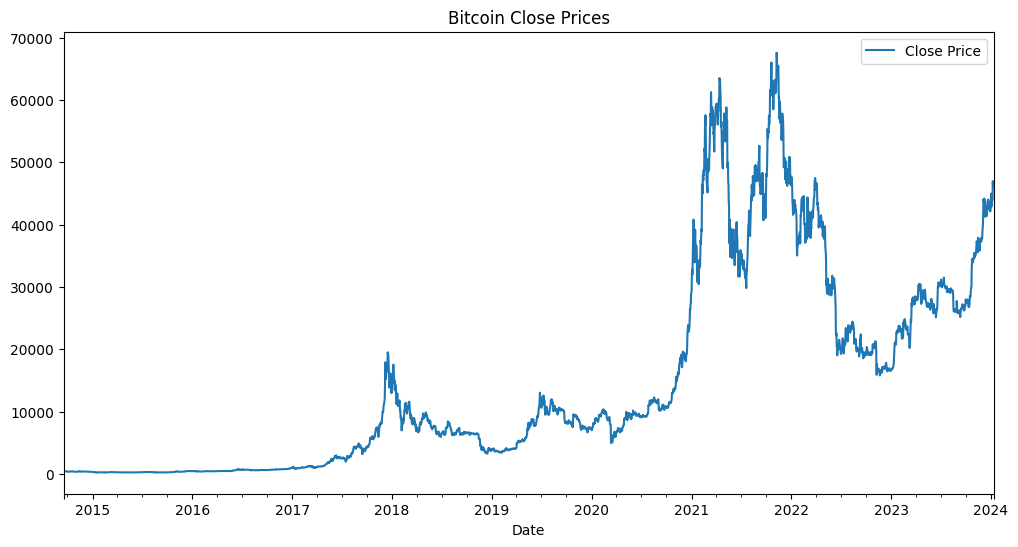

In [ ]:
plt.figure(figsize=(12, 6))
btc['close'].plot(label='Close Price')
plt.title('Bitcoin Close Prices')
plt.legend()
plt.show()


In [ ]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)



In [ ]:
import tqdm
import requests
import pandas as pd

In [ ]:
wiki.index = pd.to_datetime(wiki.index).tz_localize('UTC')
btc = btc.merge(wiki, left_index=True, right_index=True)

In [ ]:
btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [ ]:
btc


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,1
...,...,...,...,...,...,...,...,...,...
2022-09-04 00:00:00+00:00,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.400000,-0.108480,0.150000,0
2022-09-05 00:00:00+00:00,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.400000,-0.108480,0.150000,0
2022-09-06 00:00:00+00:00,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.433333,-0.081502,0.150000,1
2022-09-07 00:00:00+00:00,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0.433333,-0.081502,0.150000,1


In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

In [ ]:
btc = add_gross_profit_feature(btc)

In [ ]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,target,gross_profit
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,0,9.629991e+09
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,0,1.463605e+10
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,1,1.497055e+10
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,0,1.507367e+10
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,1,1.060070e+10
...,...,...,...,...,...,...,...,...,...,...
2022-09-04 00:00:00+00:00,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.400000,-0.108480,0.150000,0,5.045818e+14
2022-09-05 00:00:00+00:00,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.400000,-0.108480,0.150000,0,5.708630e+14
2022-09-06 00:00:00+00:00,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.433333,-0.081502,0.150000,1,8.176297e+14
2022-09-07 00:00:00+00:00,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0.433333,-0.081502,0.150000,1,6.797863e+14


In [ ]:
predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment", "gross_profit"]

In [ ]:
train = btc.iloc[:-200]
test = btc.iloc[-200:]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index, name="predictions")

In [ ]:
from sklearn.metrics import  precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)
precision_score (test["target"],preds)

0.4810126582278481

In [ ]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["target"])
  preds = model.predict(test[predictors])
  combined = pd.concat([test["target"],preds],axis =1)
  return combined




In [ ]:
precision = precision_score(test["target"], preds)
print(f"Precision Score: {precision}")

Precision Score: 0.4810126582278481


In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index, name="predictions")

        combined = pd.concat([test["target"], preds], axis=1)
        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [ ]:
predictions = pd.concat([test["target"], preds], axis=1)

In [ ]:
pip install XGBClassifier

ERROR: Could not find a version that satisfies the requirement XGBClassifier (from versions: none)
ERROR: No matching distribution found for XGBClassifier


In [ ]:
pip install xgboost

In [ ]:
pip install NumPy

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [ ]:
def compute_rolling(btc):
  horizons = [2,7,60,365]
  new_predictors = ["close","sentiment","neg_sentiment"]

  for horizon in horizons:
    rolling_averages = btc.rolling(horizon,min_periods = 1).mean()
    ratio_column = f"close_ratio{horizon}"
    btc[ratio_column] = btc["close"]/rolling_averages["close"]

    edit_column = f"edit_{horizon}"
    btc[edit_column]= rolling_averages["edit_count"]
    rolling = btc.rolling(horizon,closed= "left",min_periods =1).mean()
    trend_column = f"trend{horizon}"
    btc[trend_column] = rolling["target"]

    new_predictors +=[ratio_column,trend_column,edit_column]
  return btc,new_predictors


In [ ]:
btc, new_predictors = compute_rolling(btc.copy())

In [ ]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,target,gross_profit,...,trend2,close_ratio7,edit_7,trend7,close_ratio60,edit_60,trend60,close_ratio365,edit_365,trend365
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,0,9.629991e+09,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,0,1.463605e+10,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,1,1.497055e+10,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,0,1.507367e+10,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,1,1.060070e+10,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04 00:00:00+00:00,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.400000,-0.108480,0.150000,0,5.045818e+14,...,0.5,0.998906,0.342857,0.571429,0.906969,0.270556,0.433333,0.505329,0.891050,0.482192
2022-09-05 00:00:00+00:00,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.400000,-0.108480,0.150000,0,5.708630e+14,...,0.5,0.993637,0.357143,0.428571,0.900301,0.267222,0.416667,0.502031,0.890776,0.479452
2022-09-06 00:00:00+00:00,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.433333,-0.081502,0.150000,1,8.176297e+14,...,0.0,0.951291,0.376190,0.428571,0.857889,0.264444,0.400000,0.478456,0.890594,0.476712
2022-09-07 00:00:00+00:00,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0.433333,-0.081502,0.150000,1,6.797863e+14,...,0.5,0.979516,0.395238,0.428571,0.880041,0.262222,0.416667,0.490893,0.889954,0.479452


In [ ]:
visualize_data(btc, predictions)

<Figure size 1200x600 with 0 Axes>

In [ ]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,target,gross_profit,...,trend2,close_ratio7,edit_7,trend7,close_ratio60,edit_60,trend60,close_ratio365,edit_365,trend365
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,0,9.629991e+09,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,0,1.463605e+10,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,1,1.497055e+10,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,0,1.507367e+10,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,1,1.060070e+10,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04 00:00:00+00:00,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.400000,-0.108480,0.150000,0,5.045818e+14,...,0.5,0.998906,0.342857,0.571429,0.906969,0.270556,0.433333,0.505329,0.891050,0.482192
2022-09-05 00:00:00+00:00,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.400000,-0.108480,0.150000,0,5.708630e+14,...,0.5,0.993637,0.357143,0.428571,0.900301,0.267222,0.416667,0.502031,0.890776,0.479452
2022-09-06 00:00:00+00:00,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.433333,-0.081502,0.150000,1,8.176297e+14,...,0.0,0.951291,0.376190,0.428571,0.857889,0.264444,0.400000,0.478456,0.890594,0.476712
2022-09-07 00:00:00+00:00,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0.433333,-0.081502,0.150000,1,6.797863e+14,...,0.5,0.979516,0.395238,0.428571,0.880041,0.262222,0.416667,0.490893,0.889954,0.479452


In [ ]:
visualize_data

<function __main__.visualize_data(data, predictions)>